## **Ex. No. 15 - USE A DECISION TREE TO PREDICT PATIENT RECOVERY OUTCOMES**
---
Niranjana A

220301061

III BME - "A"

---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Patient survival prediction.csv')
df

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.730000,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.420000,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.950000,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.640000,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,75.0,23.060250,0,Caucasian,M,177.8,Floor,...,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,NaN,0
91709,66119,13486,121,56.0,47.179671,0,Caucasian,F,183.0,Floor,...,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
91710,8981,58179,195,48.0,27.236914,0,Caucasian,M,170.2,Accident & Emergency,...,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
91711,33776,120598,66,NaN,23.297481,0,Caucasian,F,154.9,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [ ]:
#data pre-processing
columns_to_drop = ['encounter_id', 'patient_id', 'hospital_id', 'icu_id', 'Unnamed: 83']
df = df.drop(columns=columns_to_drop)

In [ ]:
df.isnull().sum()

,0
age,4228
bmi,3429
elective_surgery,0
ethnicity,1395
gender,25
...,...
lymphoma,715
solid_tumor_with_metastasis,715
apache_3j_bodysystem,1662
apache_2_bodysystem,1662


In [ ]:
# Iterate through columns
for column in df.columns:
    if df[column].dtype == 'float64':
        # Handle numeric columns (replace NaN with mean)
        df[column].fillna(df[column].mean(), inplace=True)
    elif df[column].dtype == 'object':
        # Handle categorical columns (replace NaN with mode)
        df[column].fillna(df[column].mode()[0], inplace=True)

<ipython-input-41-d3cb5764a1d4>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
<ipython-input-41-d3cb5764a1d4>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

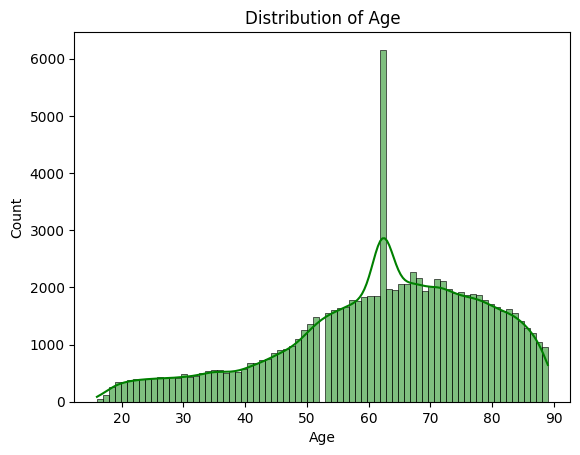

In [ ]:
# Create a histogram with a kernel density estimate for the 'age' column
sns.histplot(df['age'], kde=True, color="green")

# Label the x-axis and y-axis
plt.xlabel("Age")
plt.ylabel("Count")

# Set the title of the plot
plt.title("Distribution of Age")

# Display the plot
plt.show()

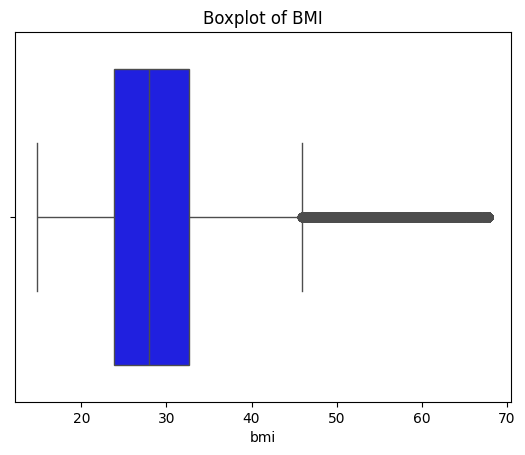

In [ ]:
# Create a boxplot for the 'bmi' column
sns.boxplot(x=df['bmi'], color="blue")

# Add labels to the x-axis
plt.xlabel("bmi")

# Set the title of the plot
plt.title("Boxplot of BMI")

# Display the plot
plt.show()

In [ ]:
# Count the occurrences of each gender category
df['gender'].value_counts()

,count
gender,
M,49494
F,42219


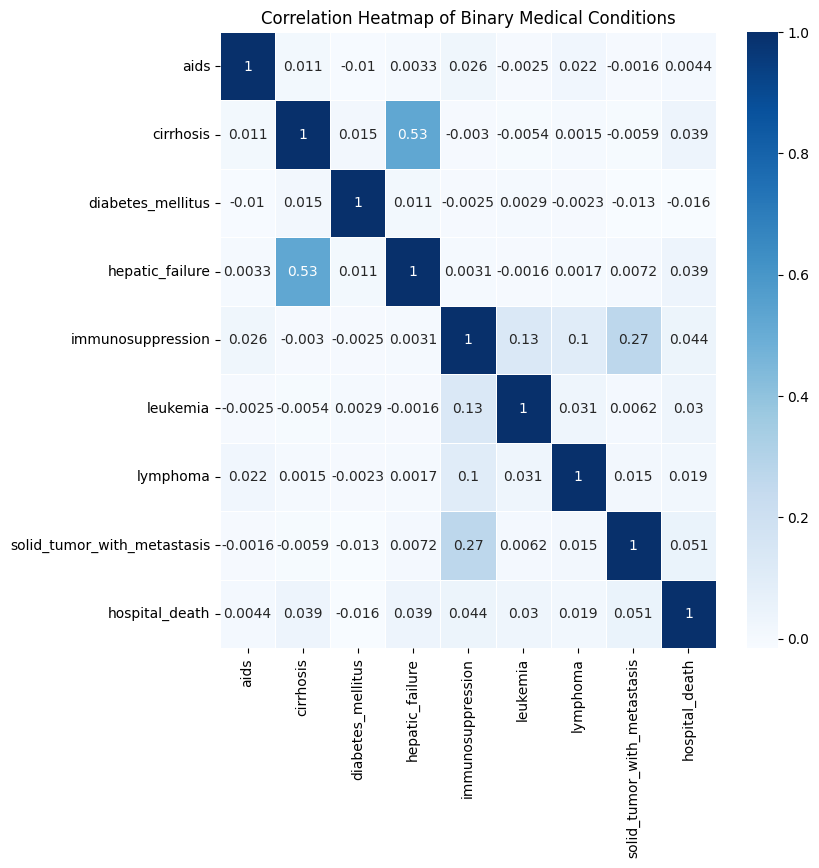

In [ ]:
# Select the binary columns
binary_columns = df[['aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis', 'hospital_death']]

# Calculate the correlation matrix
correlation_matrix = binary_columns.corr()

# Create a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.5)

# Add a title
plt.title('Correlation Heatmap of Binary Medical Conditions')

# Show the plot
plt.show()

In [ ]:
#Encoding categorical variables
df["ethnicity"] = df["ethnicity"].replace("Caucasian", 0).replace("African American", 1).replace("Other/Unknown", 2).replace("Hispanic", 3).replace("Asian", 4).replace("Native American", 5)
df["gender"] = df["gender"].replace("M", 0).replace("F", 1)
df["icu_admit_source"] = df["icu_admit_source"].replace("Accident & Emergency", 0).replace("Operating Room / Recovery", 1).replace("Floor", 2).replace("Other Hospital", 3).replace("Other ICU", 4)
df["icu_stay_type"] = df["icu_stay_type"].replace("admit", 0).replace("transfer", 1).replace("readmit", 2)
df["icu_type"] = df["icu_type"].replace("Med-Surg ICU", 0).replace("MICU", 1).replace("Neuro ICU", 2).replace("CCU-CTICU", 3).replace("SICU", 4).replace("Cardiac ICU", 5).replace("CSICU", 6).replace("CTICU", 7)
df["apache_3j_bodysystem"] = df["apache_3j_bodysystem"].replace("Cardiovascular", 0).replace("Neurological", 1).replace("Sepsis", 2).replace("Respiratory", 3).replace("Gastrointestinal", 4).replace("Metabolic", 5).replace("Trauma", 6).replace("Genitourinary", 7).replace("Musculoskeletal/Skin", 8).replace("Hematological", 9).replace("Gynecological", 10)
df["apache_2_bodysystem"] = df["apache_3j_bodysystem"].replace("Cardiovascular", 0).replace("Neurologic", 1).replace("Respiratory", 2).replace("Gastrointestinal", 3).replace("Metabolic", 4).replace("Trauma", 5).replace("Undefined diagnoses", 6).replace("Renal/Genitourinary", 7).replace("Haematologic", 8).replace("Undefined Diagnoses", 9)

<ipython-input-51-0bb3e7d69298>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["ethnicity"] = df["ethnicity"].replace("Caucasian", 0).replace("African American", 1).replace("Other/Unknown", 2).replace("Hispanic", 3).replace("Asian", 4).replace("Native American", 5)
<ipython-input-51-0bb3e7d69298>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["gender"] = df["gender"].replace("M", 0).replace("F", 1)
<ipython-input-51-0bb3e7d69298>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a f

In [ ]:
# How many times each unique value appears in icu_admit_source column
df['icu_admit_source'].value_counts()

,count
icu_admit_source,
0,54172
1,18713
2,15611
3,2358
4,859


In [ ]:
# Split the dataset into features (X) and the target variable (y)
X = df.drop('hospital_death', axis=1)
y = df['hospital_death']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create and fit a decision tree classifier
DT_model = DecisionTreeClassifier(random_state=42)
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions using the test set
DT_y_pred = DT_model.predict(X_test)

In [ ]:
# Evaluate the model's performance
DT_accuracy = accuracy_score(y_test, DT_y_pred)
DT_classification_rep = classification_report(y_test, DT_y_pred)
DT_confusion = confusion_matrix(y_test, DT_y_pred)

# Print the results
print("Decision Tree:-\nAccuracy:", DT_accuracy)
print("F1-score:", f1_score(y_test, DT_y_pred))
print("Precision:", precision_score(y_test, DT_y_pred))
print("Recall:", recall_score(y_test, DT_y_pred))
print("\nDecision Tree Classification Report:\n", DT_classification_rep)
print("\nDecision Tree Confusion Matrix:\n", DT_confusion)

Decision Tree:-
Accuracy: 0.8777735375892711
F1-score: 0.3359004739336493
Precision: 0.3169368362213527
Recall: 0.3572778827977316

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93     16756
           1       0.32      0.36      0.34      1587

    accuracy                           0.88     18343
   macro avg       0.63      0.64      0.63     18343
weighted avg       0.88      0.88      0.88     18343


Decision Tree Confusion Matrix:
 [[15534  1222]
 [ 1020   567]]


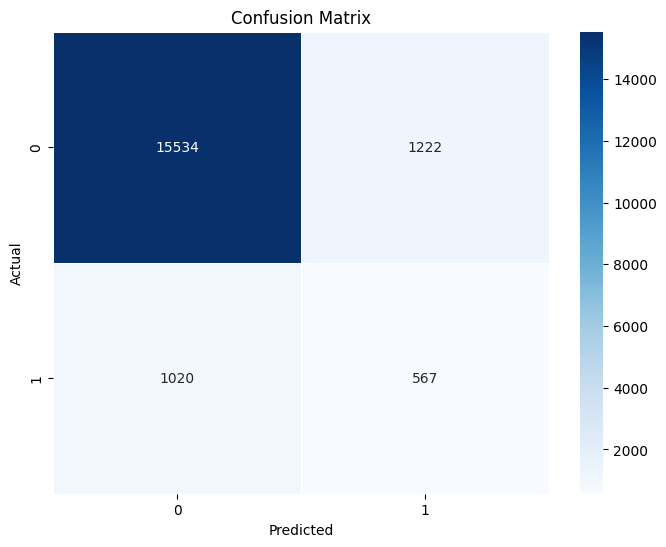

In [ ]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(DT_confusion, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()